# Numpy Excercise

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Linear Regression

编写一个用于线性回归的神经元模型，并用于拟合以下线性方程：$𝑦=2𝑥+1$。请根据该方程生成带噪声的训练样本，用于训练你编写的模型。

In [3]:
#在下面编写一个类LinearNeuron，表示线性神经元
class LinearNeuron:
    def __init__(self, dim=1):
        self.w = np.random.rand(dim) # vector
        self.b = np.random.rand(1) # vector
    
    def forward(self, X: np.ndarray):
        # vector @ vector -> scalar
        # matrix @ vector -> vector

        # scalar + vector -> vector
        # vector + vector -> vector
        return X@self.w + self.b # vector

neuron = LinearNeuron(5)
neuron.w = np.array([1, 1, 1, 1, 1], dtype=np.float64)
neuron.b = np.array([1], dtype=np.float64)

x = np.arange(5, dtype=np.float64)
X = np.arange(10, dtype=np.float64).reshape(2, 5)
np.testing.assert_equal(neuron.forward(x), np.sum(x) + 1)
np.testing.assert_equal(neuron.forward(X), np.sum(X, axis=1) + 1)

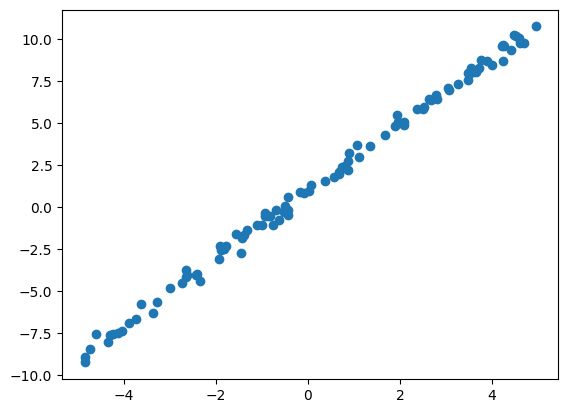

In [4]:
#生成随机样本
x = np.random.rand(100)*10 - 5 #(-5,5)区间上均匀分布的随机样本x
y = 2*x+1 + np.random.randn(100)*0.3 #y=2x+1+noise,噪声满足0均值，标准差为0.3的高斯分布

plt.figure()
plt.scatter(x, y)
plt.show()

In [5]:
#在下面编写代码，使用你编写的神经元模型拟合上面的样本
lr = 0.001
epoch = 100
neuron = LinearNeuron()
while epoch:
    z = neuron.forward(x.reshape(100, 1)) # vector
    err = z - y # vector
    loss = np.sum(np.square(err))
    dw = err @ x.reshape(100, 1) # vector
    db = np.sum(err)
    neuron.w = neuron.w - lr*dw
    neuron.b = neuron.b - lr*db
    epoch -= 1
print(f'Result: y = {neuron.w.item():.2}x + {neuron.b.item():.2}')

Result: y = 2.0x + 0.96


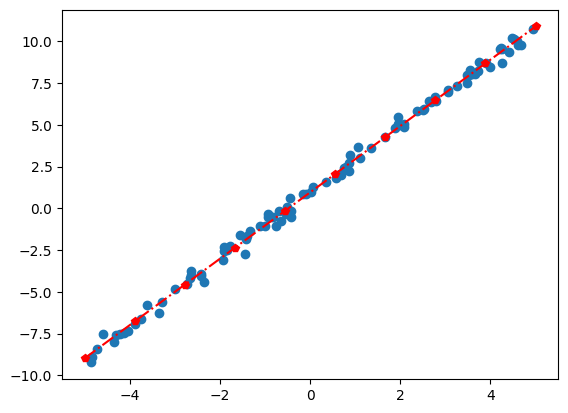

In [6]:
#在下面编写代码，绘制你拟合的直线
location_x = np.linspace(-5, 5, 10).reshape(10, 1)
location_y = neuron.forward(location_x)
plt.figure()
plt.scatter(x, y)
plt.plot(location_x, location_y, 'r-.p')
plt.show()

## 2. Polynomial Regression

使用上述神经元，拟合一个多项式：$y=x^3+2x^2+x-1$.

In [54]:
#生成随机样本
x = np.random.rand(1, 200)*10 - 5 #(-5,5)区间上均匀分布的随机样本x
y = x**3 + 2*x**2 + x - 1 + np.random.randn(1, 200)*0.5 #y=2x+1+noise,噪声满足0均值，标准差为0.5的高斯分布

In [41]:
#在下面把把样本分成训练集和测试集
x_train = x[0,0:150]
y_train = y[0,0:150]
x_test = x[0,150:]
y_test = y[0,150:]

在下面的cell里编写代码，实现多项式曲线拟合

In [55]:
#1.首先用训练集样本做数据处理，使得你的样本可以用线性回归拟合
#注意：用训练集计算预处理的参数（比如均值、标准差等），并用这些参数对测试机做预处理。
x = np.concatenate((x**3, x**2, x), axis=0).T
x_train = x[:150, :]
y_train = y[0, :150]
x_test = x[150:, :]
y_test = y[0, 150:]

In [69]:
#2.编写代码，使用上一题定义的线性神经元拟合你的样本
lr = 0.000001
epoch = 100000
neuron = LinearNeuron(3)
while epoch:
    z = neuron.forward(x_train) # vector
    err = z - y_train # vector
    loss = np.sum(np.square(err))
    dw = err @ x_train # vector
    db = np.sum(err)
    neuron.w = neuron.w - lr*dw
    neuron.b = neuron.b - lr*db
    epoch -= 1
print(f'Result: y = {neuron.w.item(0):.2}x^3 + {neuron.w.item(1):.2}x^2 + {neuron.w.item(2):.2}x {neuron.b.item():.2}')

Result: y = 1.0x^3 + 2.0x^2 + 0.96x -0.97


In [73]:
#3.在下面编写代码，计算你训练的模型的训练误差和测试误差(用MSE计算)
z = neuron.forward(x_train) # vector
err = z - y_train # vector
mse_loss_train = np.mean(np.square(err))
print(f'MSE Train: {mse_loss_train:.4}')

z = neuron.forward(x_test) # vector
err = z - y_test # vector
mse_loss_train = np.mean(np.square(err))
print(f'MSE Test: {mse_loss_train:.4}')

MSE Train: 0.2232
MSE Test: 0.2864


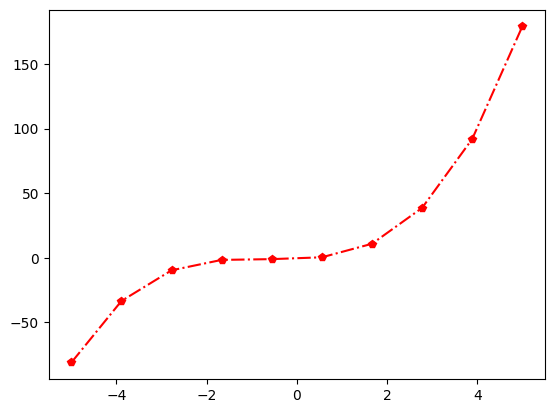

In [84]:
#4.在下面编写代码，绘制你拟合的曲线
x = np.linspace(-5, 5, 10)
input_x = np.stack((x**3, x**2, x), axis=0).T
y = neuron.forward(input_x)

plt.figure()
plt.plot(x, y, 'r-.p')
plt.show()

## 3. MNIST手写体数字识别

使用softmax实现MNIST手写体数字识别.

In [203]:
#读取MNIST手写体数字，训练样本在data/MNIST/mnist_train.csv文件中，测试样本在data/MNIST/mnist_test.csv文件中
#每一行表示一个样本，每一行第一个数字是样本的标号

#为了节省计算，本试验只使用测试集样本
df = pd.read_csv('data/MNIST/mnist_test.csv')
data = np.vstack((df.columns.to_numpy(),df.to_numpy())).astype(np.float32)
y,x = data[:,0],data[:,1:]

print(x.shape)
print(y.shape)

(10000, 784)
(10000,)


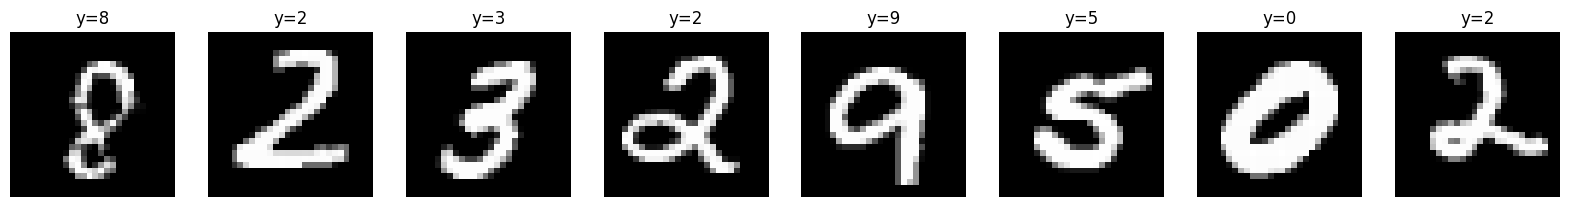

In [204]:
#绘制8个随机样本
idx = np.random.choice(x.shape[0],8)
samplex = x[idx,:].reshape((-1,28,28))
sampley = y[idx]

samplex.shape

plt.figure(figsize=(20,5))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(samplex[i],cmap='gray')
    plt.axis('off')
    plt.title('y=%d'%(sampley[i]))
plt.show()

In [205]:
#在下面编写代码，把像素值x，从[0,255]区间变换到[-1,1]区间
x = x*2/255 - 1


In [206]:
#在下面编写代码，把样本集拆分为训练集和测试集，两者的比例为7:3
x_train = x[:7000, :]
y_train = y[:7000]
y_train_zeros = np.zeros((x_train.shape[0], 10))
y_train_zeros[np.arange(x_train.shape[0], dtype=np.int32), y_train.astype(np.int32)] = 1.
y_train = y_train_zeros

x_test = x[7000:, :]
y_test = y[7000:]
y_test_zeros = np.zeros((x_test.shape[0], 10))
y_test_zeros[np.arange(x_test.shape[0], dtype=np.int32), y_test.astype(np.int32)] = 1.
y_test = y_test_zeros

In [207]:
#在下面编写softmax神经元
class SoftmaxNeuron:
    def __init__(self, input_dim: int, output_dim: int):
        self.W = np.random.rand(input_dim, output_dim) # matrix
        self.b = np.random.rand(output_dim) # vector
    
    def forward(self, X): 
        """
        :param X size: (N, input_dim)
        :return size: (N, output_dim)
        """
        Z = X @ self.W + self.b # matrix
        Z = Z - Z.max(axis=1, keepdims=True)
        expZ = np.exp(Z)
        rho = expZ / np.sum(expZ, axis=1, keepdims=True)
        return rho

In [234]:
#使用你编写的神经元，拟合上面的训练集
lr = 0.01
alpha = 0.1
epoch = 2000
neuron = SoftmaxNeuron(784, 10)
while epoch:
    rho = neuron.forward(x_train)
    err = rho[y_train.astype(np.bool8)]
    err = np.where(err == 0., 0.000001, err)
    loss = np.mean(-np.log(err))
    dw = (-((y_train - rho).T @ x_train).T / x_train.shape[0]) + alpha*neuron.W
    db = -np.mean(y_train-rho, axis=0)
    neuron.W = neuron.W - lr*dw
    neuron.b = neuron.b - lr*db
    epoch -= 1
print(f'Loss: {loss:.3f}')

Loss: 0.485


In [258]:
#测试你训练的模型在训练集和测试集上的识别率
predict = neuron.forward(x_train).argmax(axis=1)
result = y_train.argmax(axis=1)
right_count = np.sum(predict==result)
print(f'Train Set acc: {100*right_count/predict.shape[0]:.2f}%')

predict = neuron.forward(x_test).argmax(axis=1)
result = y_test.argmax(axis=1)
right_count = np.sum(predict==result)
print(f'Test  Set acc: {100*right_count/predict.shape[0]:.2f}%')

Train Set acc: 89.03%
Test  Set acc: 89.47%


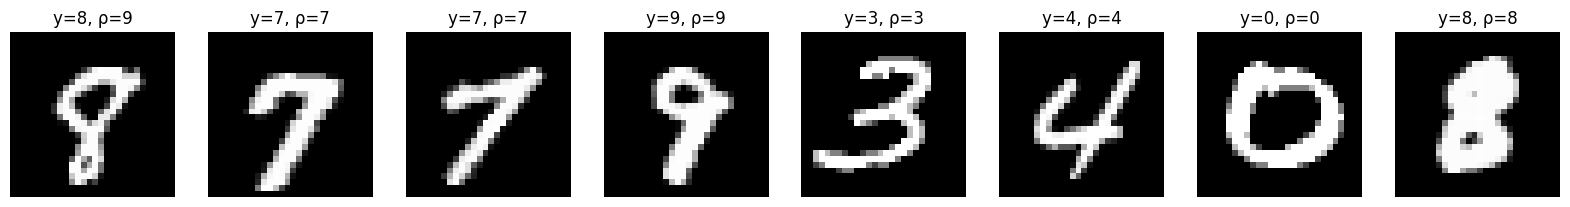

In [270]:
#绘制8个随机测试样本，并输出真实标号和预测标号
idx = np.random.choice(x_test.shape[0],8)

samplex = x_test[idx,:].reshape((-1,28,28))
sampley = y_test[idx].argmax(axis=1)
predict = neuron.forward(x_test[idx, :]).argmax(axis=1)

samplex.shape

plt.figure(figsize=(20,5))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(samplex[i],cmap='gray')
    plt.axis('off')
    plt.title('y=%d, ρ=%d'%(sampley[i].item(), predict[i].item()))
plt.show()